In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

data = pd.read_excel("Data Kuesioner Calon Mahasiswa.xlsx")
data

FileNotFoundError: [Errno 2] No such file or directory: 'Data Kuesioner Calon Mahasiswa.xlsx'

In [2]:
testpivot=pd.pivot_table(data, values = "Nama_Lengkap",
                    index = "Informasi_kampus_ITTS", aggfunc = 'count')
testpivot

,Nama_Lengkap
Informasi_kampus_ITTS,
Guru BK atau Sekolah,253
"Koran, Radio",2
"Media Sosial (IG, FB, Twitter, Youtube, TikTok, LinkedIn)",362
Newsletter via email,3
"Spanduk, Baliho, Brosur, Flyer",10
"Teman, Orang Tua atau Keluarga",237
Website (smb.ittelkom-sby.ac.id),78
Website ITTelkom Surabaya (ittelkom-sby.ac.id),192
Website masing-masing Prodi,3


In [3]:
final1 = pd.pivot_table(data, values = "Nama_Lengkap",
                    index = "Informasi_kampus_ITTS", aggfunc = 'count')

final1.reset_index(inplace=True)
final1

,Informasi_kampus_ITTS,Nama_Lengkap
0,Guru BK atau Sekolah,253
1,"Koran, Radio",2
2,"Media Sosial (IG, FB, Twitter, Youtube, TikTok...",362
3,Newsletter via email,3
4,"Spanduk, Baliho, Brosur, Flyer",10
5,"Teman, Orang Tua atau Keluarga",237
6,Website (smb.ittelkom-sby.ac.id),78
7,Website ITTelkom Surabaya (ittelkom-sby.ac.id),192
8,Website masing-masing Prodi,3


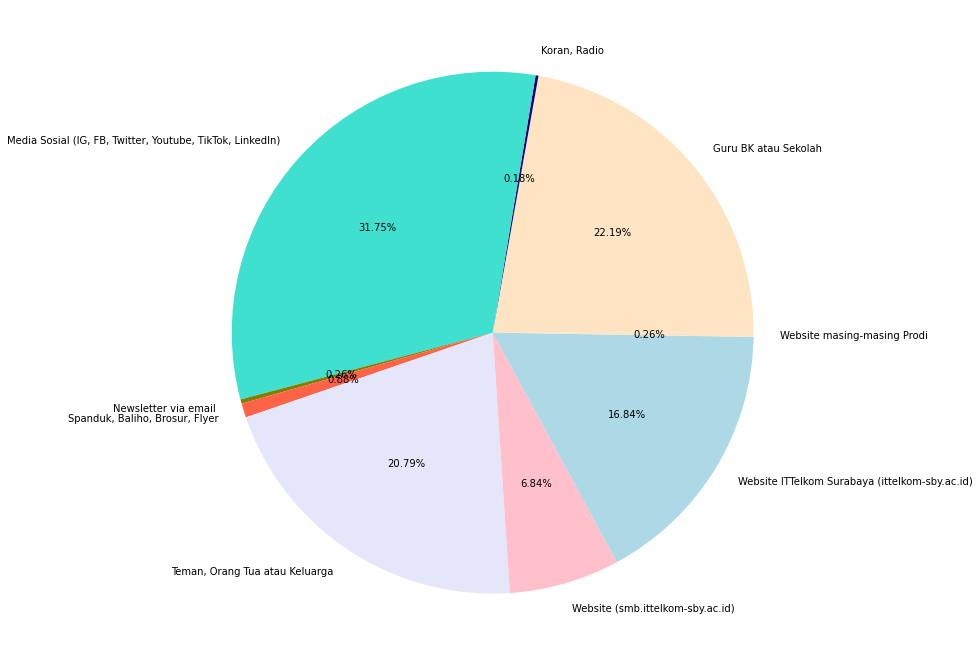

In [4]:
plt.figure(figsize=(12,12))
plt.pie(final1['Nama_Lengkap'], labels = final1['Informasi_kampus_ITTS'],
        autopct = '%1.2f%%', 
        colors=['bisque','navy','turquoise','olive','tomato','lavender', 'pink', 'lightblue'])
plt.show()

## MENCARI PERSENTASE PADA KOLOM ALASAN MASUK ITTS

Sebelum mencari persentasenya, kita perlu melakukan slicing dari data awal supaya kita bisa mengolah dengan lebih mudah dengan data secukupnya yang diperlukan. Terlebih lagi pada kolom 'alasan memilih kuliah di itts' terdapat banyak kombinasi nilai, yang bisa disimpulkan bahwa kolom tersebut memuat nilai dari pertanyaan bertipe 'checkbox'

In [5]:
data_alasan=data.iloc[:,3]
data_alasan=data_alasan.str.split('; ', expand=True)
data_alasan

,0,1,2,3,4
0,Siap Kerja,Kampus berbasis ICT,Magang di Telkom Group,Kampus Milenial,Kampus Berstandar Internasional
1,Siap Kerja,Kampus berbasis ICT,Magang di Telkom Group,Kampus Milenial,None
2,Siap Kerja,None,None,None,None
3,Siap Kerja,Kampus Milenial,None,None,None
4,Siap Kerja,Kampus berbasis ICT,Magang di Telkom Group,None,None
...,...,...,...,...,...
1135,Siap Kerja,Kampus berbasis ICT,Magang di Telkom Group,None,None
1136,Kampus Milenial,Kampus Berstandar Internasional,None,None,None
1137,Siap Kerja,Kampus berbasis ICT,Magang di Telkom Group,None,None
1138,Siap Kerja,Kampus berbasis ICT,Kampus Milenial,None,None


Setelahnya, kita perlu menggabungkan kembali kolom-kolom pada data tersebut menjadi satu kolom berkepanjangan

In [6]:
data_alasan=data_alasan.stack().reset_index().loc[:,0]
data_alasan=pd.DataFrame(data_alasan)
data_alasan.columns = ['alasan']
data_alasan['nomor']=np.arange(1,2964)
data_alasan

,alasan,nomor
0,Siap Kerja,1
1,Kampus berbasis ICT,2
2,Magang di Telkom Group,3
3,Kampus Milenial,4
4,Kampus Berstandar Internasional,5
...,...,...
2958,Siap Kerja,2959
2959,Kampus berbasis ICT,2960
2960,Kampus Milenial,2961
2961,Kampus berbasis ICT,2962


In [7]:
final2 = pd.pivot_table(data_alasan, values = "alasan",
                    index = "alasan", aggfunc = 'count')
final2.reset_index(inplace=True)
final2

,alasan,nomor
0,Kampus Berstandar Internasional,587
1,Kampus Milenial,500
2,Kampus berbasis ICT,575
3,Magang di Telkom Group,506
4,Siap Kerja,795


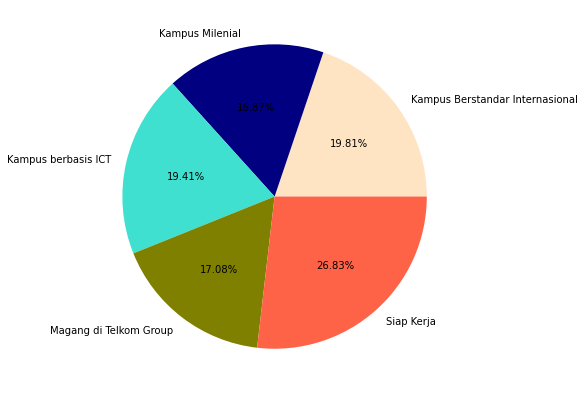

In [8]:
plt.figure(figsize=(7,7))
plt.pie(final2['nomor'], labels = final2['alasan'],
        autopct = '%1.2f%%',
        colors=['bisque','navy','turquoise','olive','tomato',
                'lavender', 'pink', 'lightblue','green'])
plt.show()

## MENCARI KORELASI DARI 2 DATA TERSEBUT

Setelah menemukan informasi dari masing-masing kolom, yaitu; info masuk kampus dan alasan masuk kampus. Selanjutnya kita akan mencari hubungan dari kedua kolom tersebut

In [9]:
xs=data.iloc[:,3]
xs=xs.str.split('; ', expand=True)
xs['Jumlah']=data['Nama_Lengkap']
xs['Informasi_kampus_ITTS']=data['Informasi_kampus_ITTS']
xs

,0,1,2,3,4,Jumlah,Informasi_kampus_ITTS
0,Siap Kerja,Kampus berbasis ICT,Magang di Telkom Group,Kampus Milenial,Kampus Berstandar Internasional,NINDA PUTRI AULIA,"Media Sosial (IG, FB, Twitter, Youtube, TikTok..."
1,Siap Kerja,Kampus berbasis ICT,Magang di Telkom Group,Kampus Milenial,None,WAHYU ADAM ANANDIKA,"Teman, Orang Tua atau Keluarga"
2,Siap Kerja,None,None,None,None,GREFLYN FELINSTYA SALHUTERU,Website ITTelkom Surabaya (ittelkom-sby.ac.id)
3,Siap Kerja,Kampus Milenial,None,None,None,CISA VALENTINO CAHYA RAMADHANI,Guru BK atau Sekolah
4,Siap Kerja,Kampus berbasis ICT,Magang di Telkom Group,None,None,NABIL ULWAN MUHAMMAD CAESAR,"Media Sosial (IG, FB, Twitter, Youtube, TikTok..."
...,...,...,...,...,...,...,...
1135,Siap Kerja,Kampus berbasis ICT,Magang di Telkom Group,None,None,MUHAMMAD IRKHAM HIDAYAT,"Media Sosial (IG, FB, Twitter, Youtube, TikTok..."
1136,Kampus Milenial,Kampus Berstandar Internasional,None,None,None,MUHAMMAD DETRI ABDUL FIKAR,Guru BK atau Sekolah
1137,Siap Kerja,Kampus berbasis ICT,Magang di Telkom Group,None,None,YASMIEN TAMALIN,Website ITTelkom Surabaya (ittelkom-sby.ac.id)
1138,Siap Kerja,Kampus berbasis ICT,Kampus Milenial,None,None,MOH RENDY PRASETYO P,Website ITTelkom Surabaya (ittelkom-sby.ac.id)


In [10]:
xs=xs.set_index(['Jumlah', 'Informasi_kampus_ITTS'])
xs

,,0,1,2,3,4
Jumlah,Informasi_kampus_ITTS,,,,,
NINDA PUTRI AULIA,"Media Sosial (IG, FB, Twitter, Youtube, TikTok, LinkedIn)",Siap Kerja,Kampus berbasis ICT,Magang di Telkom Group,Kampus Milenial,Kampus Berstandar Internasional
WAHYU ADAM ANANDIKA,"Teman, Orang Tua atau Keluarga",Siap Kerja,Kampus berbasis ICT,Magang di Telkom Group,Kampus Milenial,None
GREFLYN FELINSTYA SALHUTERU,Website ITTelkom Surabaya (ittelkom-sby.ac.id),Siap Kerja,None,None,None,None
CISA VALENTINO CAHYA RAMADHANI,Guru BK atau Sekolah,Siap Kerja,Kampus Milenial,None,None,None
NABIL ULWAN MUHAMMAD CAESAR,"Media Sosial (IG, FB, Twitter, Youtube, TikTok, LinkedIn)",Siap Kerja,Kampus berbasis ICT,Magang di Telkom Group,None,None
...,...,...,...,...,...,...
MUHAMMAD IRKHAM HIDAYAT,"Media Sosial (IG, FB, Twitter, Youtube, TikTok, LinkedIn)",Siap Kerja,Kampus berbasis ICT,Magang di Telkom Group,None,None
MUHAMMAD DETRI ABDUL FIKAR,Guru BK atau Sekolah,Kampus Milenial,Kampus Berstandar Internasional,None,None,None
YASMIEN TAMALIN,Website ITTelkom Surabaya (ittelkom-sby.ac.id),Siap Kerja,Kampus berbasis ICT,Magang di Telkom Group,None,None


In [11]:
xs=xs.stack()

In [12]:
xs=pd.DataFrame(xs)
xs.columns=['Alasan_masuk_ITTS']
xs.reset_index(inplace=True)
xs

,Jumlah,Informasi_kampus_ITTS,level_2,Alasan_masuk_ITTS
0,NINDA PUTRI AULIA,"Media Sosial (IG, FB, Twitter, Youtube, TikTok...",0,Siap Kerja
1,NINDA PUTRI AULIA,"Media Sosial (IG, FB, Twitter, Youtube, TikTok...",1,Kampus berbasis ICT
2,NINDA PUTRI AULIA,"Media Sosial (IG, FB, Twitter, Youtube, TikTok...",2,Magang di Telkom Group
3,NINDA PUTRI AULIA,"Media Sosial (IG, FB, Twitter, Youtube, TikTok...",3,Kampus Milenial
4,NINDA PUTRI AULIA,"Media Sosial (IG, FB, Twitter, Youtube, TikTok...",4,Kampus Berstandar Internasional
...,...,...,...,...
2958,MOH RENDY PRASETYO P,Website ITTelkom Surabaya (ittelkom-sby.ac.id),0,Siap Kerja
2959,MOH RENDY PRASETYO P,Website ITTelkom Surabaya (ittelkom-sby.ac.id),1,Kampus berbasis ICT
2960,MOH RENDY PRASETYO P,Website ITTelkom Surabaya (ittelkom-sby.ac.id),2,Kampus Milenial
2961,NURRULL ISLAM,"Spanduk, Baliho, Brosur, Flyer",0,Kampus berbasis ICT


In [13]:
group = xs.groupby(['Informasi_kampus_ITTS','Alasan_masuk_ITTS']).count()
del group['level_2']
group

Jumlah
Informasi_kampus_ITTS                              Alasan_masuk_ITTS                      
Guru BK atau Sekolah                               Kampus Berstandar Internasional     127
                                                   Kampus Milenial                     102
                                                   Kampus berbasis ICT                 124
                                                   Magang di Telkom Group              103
                                                   Siap Kerja                          175
Koran, Radio                                       Kampus Berstandar Internasional       1
                                                   Kampus Milenial                       1
                                                   Kampus berbasis ICT                   2
                                                   Magang di Telkom Group                1
                                                   Siap Kerja                            1
Media Sosial (IG, FB, Twitter, Youtube, TikTok,... Kampus Berstandar Internasional     204
                                                   Kampus Milenial                     170
                                                   Kampus berbasis ICT                 195
                                                   Magang di Telkom Group              170
                                                   Siap Kerja                          252
Newsletter via email                               Kampus Berstandar Internasional       1
                                                   Kampus Milenial                       1
                                                   Kampus berbasis ICT                   1
                                                   Magang di Telkom Group                2
                                                   Siap Kerja                            2
Spanduk, Baliho, Brosur, Flyer                     Kampus Berstandar Internasional       4
                                                   Kampus Milenial                       3
                                                   Kampus berbasis ICT                   3
                                                   Magang di Telkom Group                2
                                                   Siap Kerja                            5
Teman, Orang Tua atau Keluarga                     Kampus Berstandar Internasional     111
                                                   Kampus Milenial                     104
                                                   Kampus berbasis ICT                 118
                                                   Magang di Telkom Group               92
                                                   Siap Kerja                          162
Website (smb.ittelkom-sby.ac.id)                   Kampus Berstandar Internasional      47
                                                   Kampus Milenial                      37
                                                   Kampus berbasis ICT                  38
                                                   Magang di Telkom Group               40
                                                   Siap Kerja                           61
Website ITTelkom Surabaya (ittelkom-sby.ac.id)     Kampus Berstandar Internasional      91
                                                   Kampus Milenial                      81
                                                   Kampus berbasis ICT                  94
                                                   Magang di Telkom Group               94
                                                   Siap Kerja                          134
Website masing-masing Prodi                        Kampus Berstandar Internasional       1
                                                   Kampus Milenial                       1
                                                   Magang di Telkom Group       

# SCRAP
Buat latihan

In [14]:
c=xs.copy()
c

,Jumlah,Informasi_kampus_ITTS,level_2,Alasan_masuk_ITTS
0,NINDA PUTRI AULIA,"Media Sosial (IG, FB, Twitter, Youtube, TikTok...",0,Siap Kerja
1,NINDA PUTRI AULIA,"Media Sosial (IG, FB, Twitter, Youtube, TikTok...",1,Kampus berbasis ICT
2,NINDA PUTRI AULIA,"Media Sosial (IG, FB, Twitter, Youtube, TikTok...",2,Magang di Telkom Group
3,NINDA PUTRI AULIA,"Media Sosial (IG, FB, Twitter, Youtube, TikTok...",3,Kampus Milenial
4,NINDA PUTRI AULIA,"Media Sosial (IG, FB, Twitter, Youtube, TikTok...",4,Kampus Berstandar Internasional
...,...,...,...,...
2958,MOH RENDY PRASETYO P,Website ITTelkom Surabaya (ittelkom-sby.ac.id),0,Siap Kerja
2959,MOH RENDY PRASETYO P,Website ITTelkom Surabaya (ittelkom-sby.ac.id),1,Kampus berbasis ICT
2960,MOH RENDY PRASETYO P,Website ITTelkom Surabaya (ittelkom-sby.ac.id),2,Kampus Milenial
2961,NURRULL ISLAM,"Spanduk, Baliho, Brosur, Flyer",0,Kampus berbasis ICT


In [16]:
# c.to_excel("4barchart.xlsx") 

PermissionError: [Errno 13] Permission denied: '4barchart.xlsx'

In [ ]:
# group.to_excel("4barchart2.xlsx") 

In [17]:
dfcopy=xs.copy()
del dfcopy['level_2']
dfcopy

,Jumlah,Informasi_kampus_ITTS,Alasan_masuk_ITTS
0,NINDA PUTRI AULIA,"Media Sosial (IG, FB, Twitter, Youtube, TikTok...",Siap Kerja
1,NINDA PUTRI AULIA,"Media Sosial (IG, FB, Twitter, Youtube, TikTok...",Kampus berbasis ICT
2,NINDA PUTRI AULIA,"Media Sosial (IG, FB, Twitter, Youtube, TikTok...",Magang di Telkom Group
3,NINDA PUTRI AULIA,"Media Sosial (IG, FB, Twitter, Youtube, TikTok...",Kampus Milenial
4,NINDA PUTRI AULIA,"Media Sosial (IG, FB, Twitter, Youtube, TikTok...",Kampus Berstandar Internasional
...,...,...,...
2958,MOH RENDY PRASETYO P,Website ITTelkom Surabaya (ittelkom-sby.ac.id),Siap Kerja
2959,MOH RENDY PRASETYO P,Website ITTelkom Surabaya (ittelkom-sby.ac.id),Kampus berbasis ICT
2960,MOH RENDY PRASETYO P,Website ITTelkom Surabaya (ittelkom-sby.ac.id),Kampus Milenial
2961,NURRULL ISLAM,"Spanduk, Baliho, Brosur, Flyer",Kampus berbasis ICT


In [18]:
ts2 = pd.pivot_table(dfcopy, values = 'Jumlah', columns='Alasan_masuk_ITTS',
                    index = 'Informasi_kampus_ITTS', aggfunc = 'count')
ts2.reset_index(inplace=True)
ts2

Alasan_masuk_ITTS,Informasi_kampus_ITTS,Kampus Berstandar Internasional,Kampus Milenial,Kampus berbasis ICT,Magang di Telkom Group,Siap Kerja
0,Guru BK atau Sekolah,127.0,102.0,124.0,103.0,175.0
1,"Koran, Radio",1.0,1.0,2.0,1.0,1.0
2,"Media Sosial (IG, FB, Twitter, Youtube, TikTok...",204.0,170.0,195.0,170.0,252.0
3,Newsletter via email,1.0,1.0,1.0,2.0,2.0
4,"Spanduk, Baliho, Brosur, Flyer",4.0,3.0,3.0,2.0,5.0
5,"Teman, Orang Tua atau Keluarga",111.0,104.0,118.0,92.0,162.0
6,Website (smb.ittelkom-sby.ac.id),47.0,37.0,38.0,40.0,61.0
7,Website ITTelkom Surabaya (ittelkom-sby.ac.id),91.0,81.0,94.0,94.0,134.0
8,Website masing-masing Prodi,1.0,1.0,NaN,2.0,3.0


In [19]:
ts2=ts2.fillna(value=0)

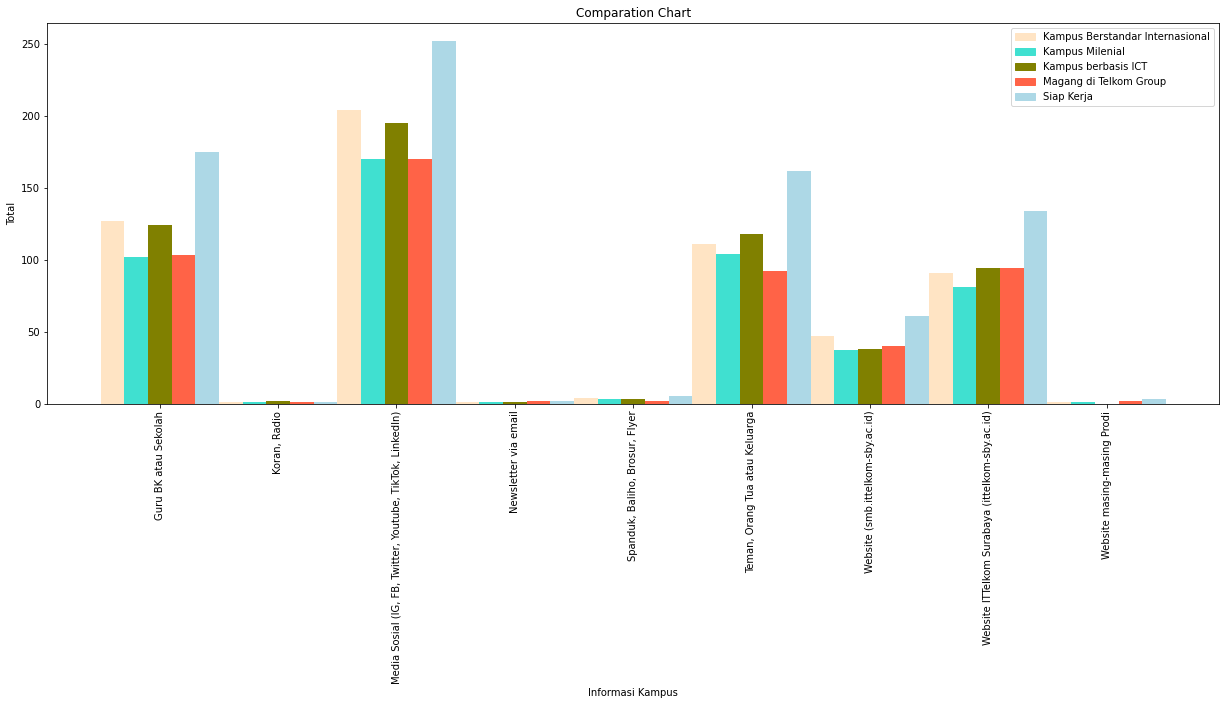

In [20]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data1 = ts2['Kampus Berstandar Internasional']
data2 = ts2['Kampus Milenial']
data3 = ts2['Kampus berbasis ICT']
data4 = ts2['Magang di Telkom Group']
data5 = ts2['Siap Kerja']

plt.figure(figsize=(21,7))

c=['bisque','turquoise','olive','tomato','lightblue']
width =0.2
plt.bar(np.arange(len(data1)), data1, width=width, color=c[0])
plt.bar(np.arange(len(data2))+ width, data2, width=width, color=c[1])
plt.bar(np.arange(len(data3))+ (2*width), data3, width=width, color=c[2])
plt.bar(np.arange(len(data4))+ (3*width), data4, width=width, color=c[3])
plt.bar(np.arange(len(data5))+ (4*width), data5, width=width, color=c[4])

plt.xticks(np.arange(len(data1))+ 2*width,ts2['Informasi_kampus_ITTS'], rotation='vertical',
           horizontalalignment='center')
plt.xlabel('Informasi Kampus')
plt.ylabel('Total')
plt.title('Comparation Chart')

import matplotlib.patches as mpatches

r1 = mpatches.Patch(color='bisque',label='Kampus Berstandar Internasional')
r2 = mpatches.Patch(color='turquoise',label='Kampus Milenial')
r3 = mpatches.Patch(color='olive',label='Kampus berbasis ICT')
r4 = mpatches.Patch(color='tomato',label='Magang di Telkom Group')
r5 = mpatches.Patch(color='lightblue',label='Siap Kerja')
plt.legend(handles=[r1,r2,r3,r4,r5])

plt.show()